In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
filename='/kaggle/input/spam-email-classification/email.csv'

df=pd.read_csv(filename)
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spam-email-classification/email.csv


In [2]:
df.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.describe()

,Category,Message
count,5573,5573
unique,3,5158
top,ham,"Sorry, I'll call later"
freq,4825,30


In [35]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [43]:
df_x=df['Message'].values
df_y=df['Category'].values
X_train,X_test,Y_train,Y_test=train_test_split(df_x,df_y,test_size=0.20)

In [47]:
categories=['ham','spam']
vectorizer=CountVectorizer()
word_tokens = vectorizer.fit_transform(X_train)
target = [categories.index(category) for category in categories]
# feature_names = vectorizer.get_feature_names_out()
# feature_names_str = ', '.join(feature_names)
# print(feature_names_str)

In [48]:
classifier=GaussianNB()
classifier.fit(word_tokens.toarray(), Y_train)

GaussianNB()

In [51]:
word_token_test = vectorizer.transform(X_test)
Y_pred = classifier.predict(word_token_test.toarray())
Y_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U14')

Accuracy: 0.9013452914798207
Confusion Matrix:
[[867  99]
 [ 11 138]]


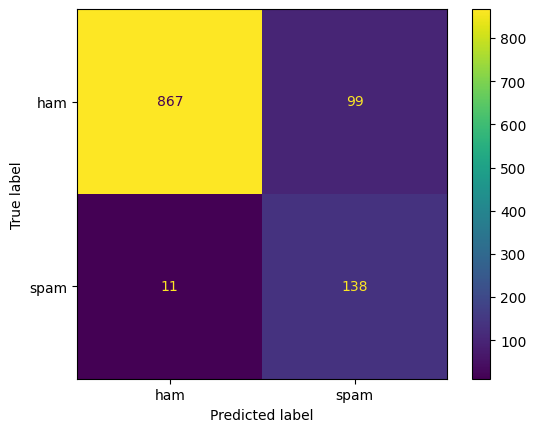

In [62]:
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay

accuracy = accuracy_score(Y_test, Y_pred)
confusion_mat = confusion_matrix(Y_test, Y_pred, labels=['ham', 'spam'])

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_mat)

# Display the confusion matrix
labels = ['ham', 'spam']
display = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=labels)
display.plot()